In [1]:
#Installing Neccessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import plotly.express as px

# **Data Description**

- VIN (1-10): The first 10 characters of the vehicle’s VIN (Vehicle Identification Number).
- County: The region where the vehicle’s owner is registered. Owners in Washington may have vehicles located in other states.
- City: The city where the owner lives.
- State: The state linked to the vehicle's registration.
- Postal Code: The 5-digit ZIP code of the owner’s address.
- Model Year: The year of the vehicle, decoded from the VIN.
- Make: The manufacturer of the vehicle, decoded from the VIN.
- Model: The vehicle’s model, decoded from the VIN.
- Electric Vehicle Type: Whether the vehicle is fully electric or a plug-in hybrid.
- CAFV Eligibility: Whether the vehicle qualifies as a Clean Alternative Fuel Vehicle (CAFV) based on Washington's 2019 House Bill 2042.
- Electric Range: How far the vehicle can go on electric power alone.
- Base MSRP: The lowest suggested retail price for the vehicle’s model.
- Legislative District: The Washington state legislative area where the owner lives.
- DOL Vehicle ID: A unique ID assigned by the Department of Licensing (DOL).
- Vehicle Location: The center of the vehicle's registered ZIP code.
- Electric Utility: The electric utility serving the owner’s address.
- 2020 Census Tract: The census tract code (state + county + tract) assigned by the U.S. Census Bureau.

In [45]:
df=pd.read_csv("/content/dataset.csv")

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [4]:
df.shape

(112634, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [6]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112348.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.805604,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.700545,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [7]:
#checking for null values
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,20
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [10]:
#removing leading and trailing spaces
df.columns = df.columns.str.strip()

Dealing with Missing values

In [11]:
df['Model'].mode()[0]

'MODEL 3'

In [12]:
df['Model'].fillna(df['Model'].mode()[0])

,Model
0,RAV4 PRIME
1,VOLT
2,LEAF
3,BOLT EV
4,FUSION
...,...
112629,MODEL Y
112630,LEAF
112631,ESCAPE
112632,NIRO


In [13]:
df['Legislative District'].unique()

array([nan, 15., 39., 38.,  1., 21., 10., 40., 22., 13., 20.,  2., 32.,
        7., 46., 30., 35., 44., 14.,  9.,  3., 23., 24.,  5., 33., 45.,
       19., 27., 26., 25., 43., 17.,  6., 41., 37., 34., 31., 12., 28.,
       48., 49.,  4., 29., 36., 42.,  8., 18., 11., 16., 47.])

In [14]:
df['Legislative District'] = df['Legislative District'].fillna(df['Legislative District'].mean())


In [15]:
df['Vehicle Location'].unique()

array(['POINT (-81.80023 24.5545)', 'POINT (-114.57245 35.16815)',
       'POINT (-120.50721 46.60448)', 'POINT (-121.7515 48.53892)',
       'POINT (-122.20596 47.97659)', 'POINT (-122.18384 47.8031)',
       'POINT (-122.23019 47.94949)', 'POINT (-122.29196 47.89908)',
       'POINT (-122.35803 47.9796)', 'POINT (-122.61214 48.51748)',
       'POINT (-122.75379 47.06316)', 'POINT (-119.2771 47.13196)',
       'POINT (-89.79939 38.49028)', 'POINT (-123.08743 46.82175)',
       'POINT (-122.33029 48.46846)', nan, 'POINT (-122.19388 48.15353)',
       'POINT (-122.27734 47.83785)', 'POINT (-73.84643 43.1284)',
       'POINT (-122.31768 47.87166)', 'POINT (-117.54392 47.77676)',
       'POINT (-122.92333 47.03779)', 'POINT (-122.27981 47.85727)',
       'POINT (-122.3026 47.72656)', 'POINT (-122.23035 47.3074)',
       'POINT (-122.31765 47.70013)', 'POINT (-122.37689 47.81116)',
       'POINT (-122.40618 48.0399)', 'POINT (-122.82324 47.04437)',
       'POINT (-122.89166 47.03956)', 'PO

In [16]:
df['Vehicle Location'] = df['Vehicle Location'].fillna(df['Vehicle Location'].mode()[0])


In [17]:
df['Electric Utility'].unique()

array([nan, 'PACIFICORP', 'PUGET SOUND ENERGY INC',
       'PUD NO 2 OF GRANT COUNTY',
       'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',
       'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)', 'AVISTA CORP',
       'MODERN ELECTRIC WATER COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF ELLENSBURG - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF GRAYS HARBOR COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY',
       'PUD NO 1 OF CHELAN COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||VERA IRRIGATION DISTRICT #15',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||ELMHURST MUTUAL POWER & LIGHT CO|PENINSULA

In [18]:
df['Electric Utility'] = df['Electric Utility'].fillna(df['Electric Utility'].mode()[0])

In [19]:
df.isna().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,20
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


## **TASK-1**

In [20]:
# Save the DataFrame to a CSV file with the correct filename
df.to_csv('Electric_Vehicle_data.csv', index=False)

# Now read the CSV file using the same filename.
df_new = pd.read_csv('Electric_Vehicle_data.csv')

In [21]:
df_new

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,29.805604,198968248,POINT (-81.80023 24.5545),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,29.805604,5204412,POINT (-114.57245 35.16815),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.000000,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.000000,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.000000,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112629,7SAYGDEF2N,King,Duvall,WA,98019,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.000000,217955265,POINT (-121.98609 47.74068),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032401
112630,1N4BZ1CP7K,San Juan,Friday Harbor,WA,98250,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,40.000000,103663227,POINT (-123.01648 48.53448),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,53055960301
112631,1FMCU0KZ4N,King,Vashon,WA,98070,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,34.000000,193878387,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033027702
112632,KNDCD3LD4J,King,Covington,WA,98042,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,47.000000,125039043,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032007


In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [23]:
df_new.isna().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,20
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


**Uni Variate Analysis**

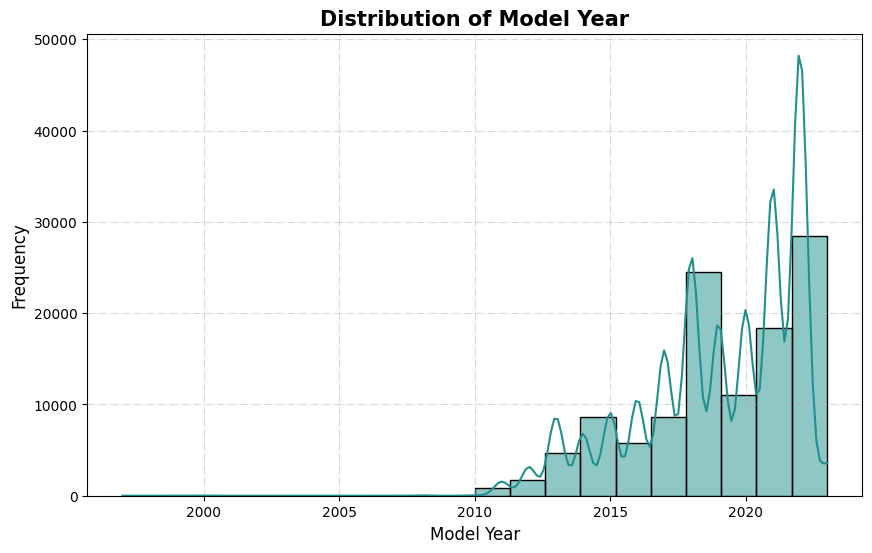

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(df_new['Model Year'],bins=20,kde=True, color='#21908D',edgecolor='black')
plt.title('Distribution of Model Year',fontsize=15,fontweight='bold')
plt.xlabel('Model Year',fontsize=12, fontweight='medium')
plt.ylabel('Frequency',fontsize=12, fontweight='medium')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True,linestyle='-.',alpha=0.5)
plt.show()

The dataset primarily reflects recent vehicle manufacturing trends, with a notable peak around 2022, indicating a scarcity of older vehicles.

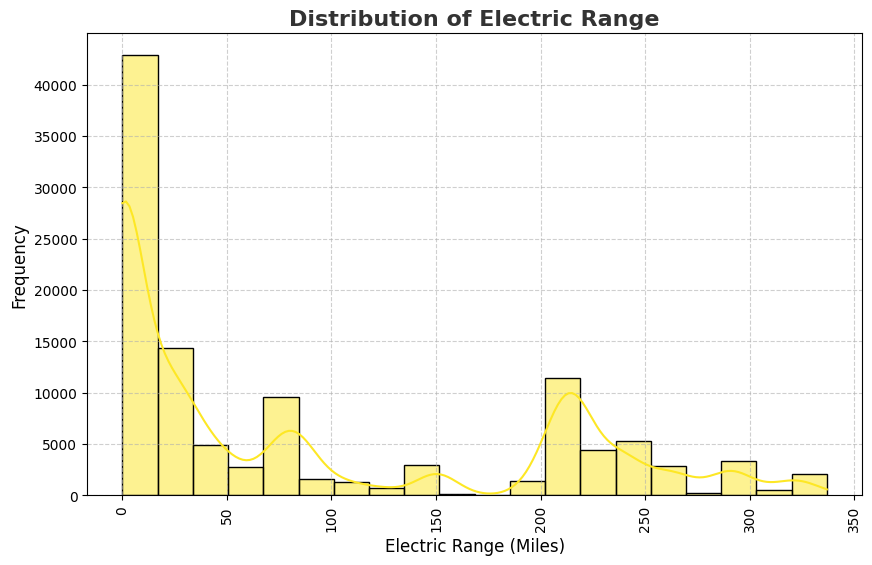

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=20, kde=True, color='#FDE725', edgecolor='black')  # Color from viridis palette
plt.title('Distribution of Electric Range', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Electric Range (Miles)', fontsize=12, fontweight='medium')
plt.ylabel('Frequency', fontsize=12, fontweight='medium')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


The histogram reveals that the majority of vehicles in the dataset have an electric range concentrated around 100 miles, indicating that most models offer a range between 75 and 125 miles. This suggests a trend toward moderate electric ranges, with a notable scarcity of vehicles offering ranges below 25 miles and a gradual decline in frequency for higher ranges.

<ipython-input-26-a66fa5d4fbdd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')


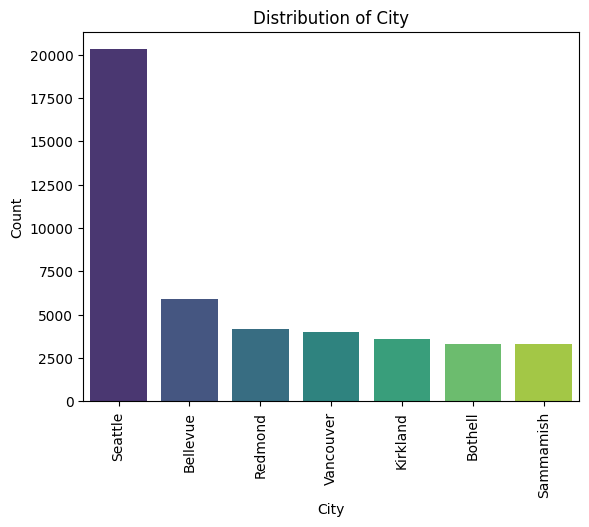

In [26]:
# Count the occurrences of each city
city_counts = df_new['City'].value_counts()

# Select the top 7 cities
top_cities = city_counts[:7]

# Create the bar plot
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title("Distribution of City")
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

Seattle is the most prominent city in the region, with a notable presence compared to nearby cities like Bellevue and Redmond. This reflects Seattle's appeal as a cultural and economic hub, while the other cities contribute to a diverse and vibrant metropolitan area. Further exploration could reveal the unique characteristics that attract residents and visitors to each city.

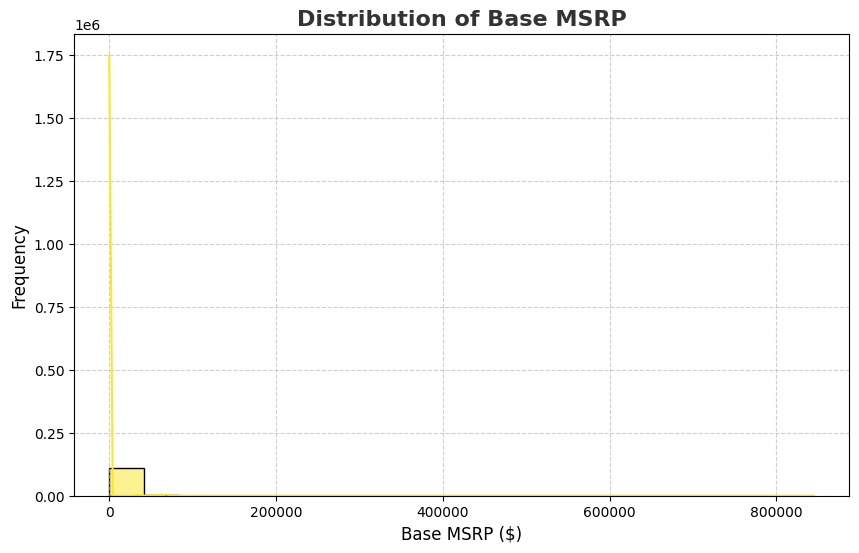

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df_new['Base MSRP'], bins=20, kde=True, color='#FDE725', edgecolor='black')  # Color from viridis palette
plt.title('Distribution of Base MSRP', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Base MSRP ($)', fontsize=12, fontweight='medium')
plt.ylabel('Frequency', fontsize=12, fontweight='medium')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

The histogram reveals that most cars in the dataset are priced under $50,000, indicating a prevalent market for more affordable vehicles. The rightward skew suggests that while most cars are budget-friendly, there are a limited number of high-end models significantly increasing the average MSRP. This highlights the diversity in vehicle pricing and suggests potential opportunities in both affordable and luxury segments.








In [28]:
df['Make'].unique()

array(['TOYOTA', 'CHEVROLET', 'NISSAN', 'FORD', 'TESLA', 'KIA', 'AUDI',
       'FIAT', 'BMW', 'PORSCHE', 'CADILLAC', 'HONDA', 'MITSUBISHI',
       'CHRYSLER', 'RIVIAN', 'HYUNDAI', 'VOLVO', 'VOLKSWAGEN',
       'MERCEDES-BENZ', 'JEEP', 'MINI', 'SMART', 'SUBARU', 'POLESTAR',
       'LUCID MOTORS', 'LINCOLN', 'JAGUAR', 'FISKER', 'LAND ROVER',
       'LEXUS', 'TH!NK', 'GENESIS', 'BENTLEY', 'AZURE DYNAMICS'],
      dtype=object)

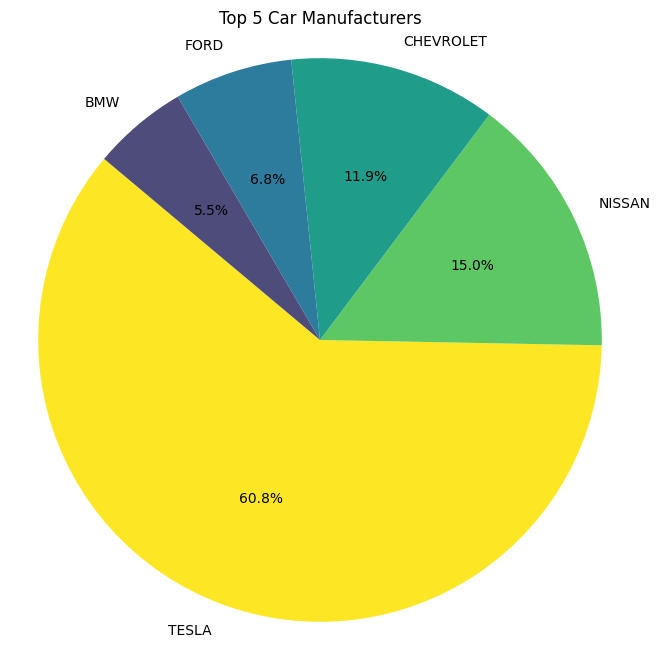

In [29]:
make_counts = df_new['Make'].value_counts()

# Select the top 5 makes
top_makes = make_counts.head(5)

# Define a color palette with distinct colors
colors = ['#FDE725', '#5DC863', '#1F9D8A', '#2D7B9D', '#4E4C7A']  # You can customize these colors

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_makes, labels=top_makes.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 5 Car Manufacturers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Tesla is the top car manufacturer with 60.8% market share, followed by Nissan with 15%, Chevrolet with 11.9%, Ford with 6.8%, and BMW with 5.5%.

**Bi Variate Analysis**

<ipython-input-30-b5bf30cca92a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df_new, palette='viridis')  # Using the Viridis palette


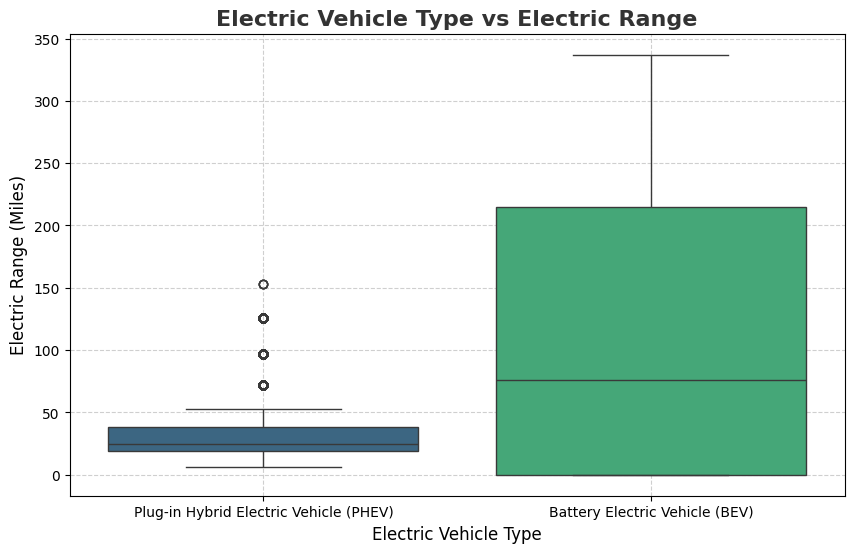

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df_new, palette='viridis')  # Using the Viridis palette
plt.title('Electric Vehicle Type vs Electric Range', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Electric Vehicle Type', fontsize=12, fontweight='medium')
plt.ylabel('Electric Range (Miles)', fontsize=12, fontweight='medium')
plt.xticks(rotation=0, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

###How does Model Year influence the Electric Range across different Make

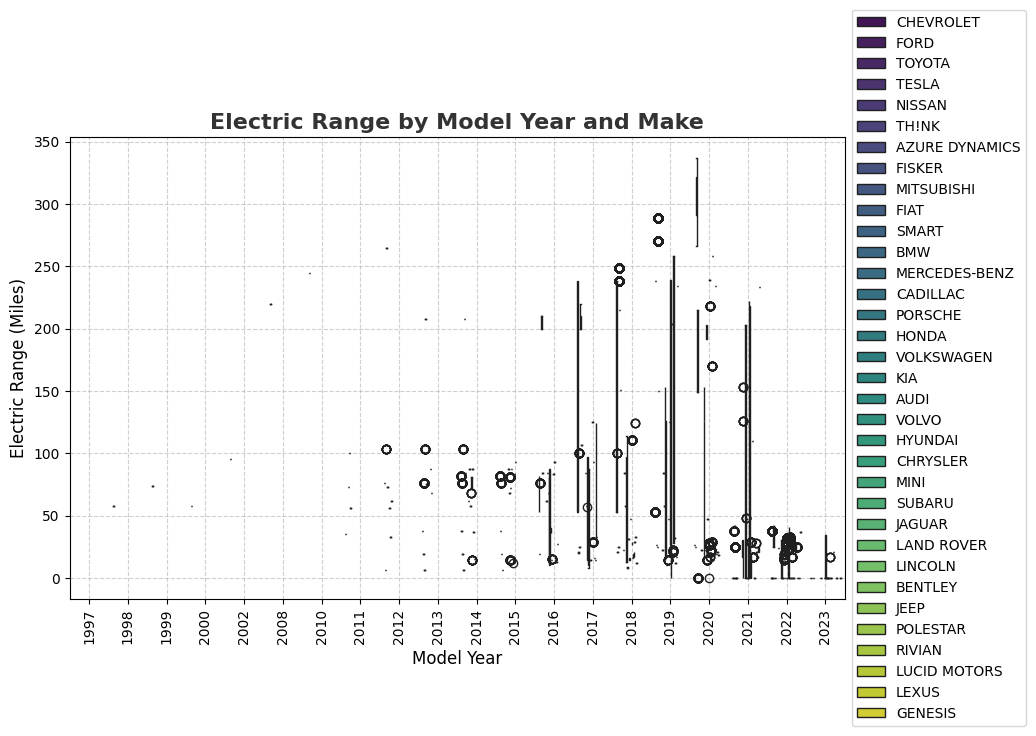

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_new["Model Year"], y=df_new["Electric Range"], hue=df_new["Make"], palette='viridis')  # Using the Viridis palette
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.title('Electric Range by Model Year and Make', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Model Year', fontsize=12, fontweight='medium')
plt.ylabel('Electric Range (Miles)', fontsize=12, fontweight='medium')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<ipython-input-32-e7c8769ce14c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Electric Vehicle Type', y='Base MSRP', data=df, palette='viridis')  # Using 'viridis' palette for a vibrant color scheme


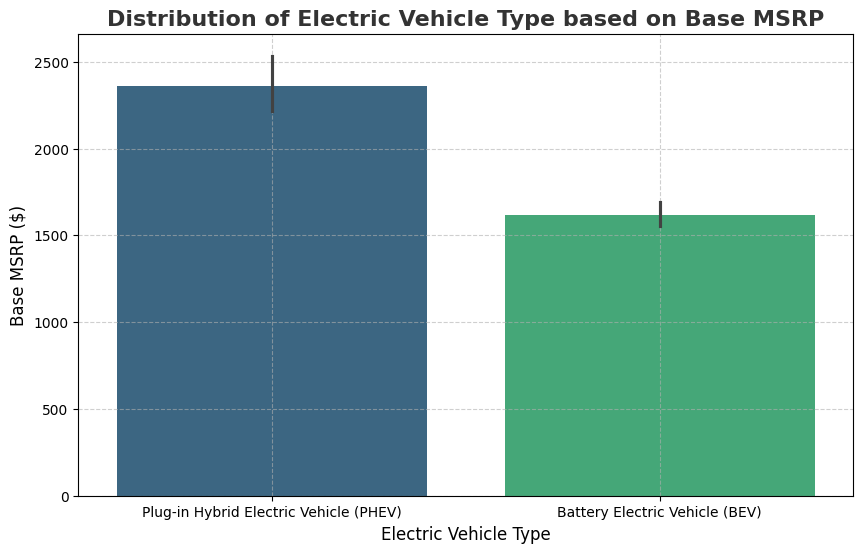

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Electric Vehicle Type', y='Base MSRP', data=df, palette='viridis')  # Using 'viridis' palette for a vibrant color scheme
plt.title('Distribution of Electric Vehicle Type based on Base MSRP', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Electric Vehicle Type', fontsize=12, fontweight='medium')
plt.ylabel('Base MSRP ($)', fontsize=12, fontweight='medium')
plt.xticks(rotation=0, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<ipython-input-33-919472dda08a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Make', y='Base MSRP', data=df[df['Make'].isin(top_makes)], palette='viridis')  # Using 'viridis' palette


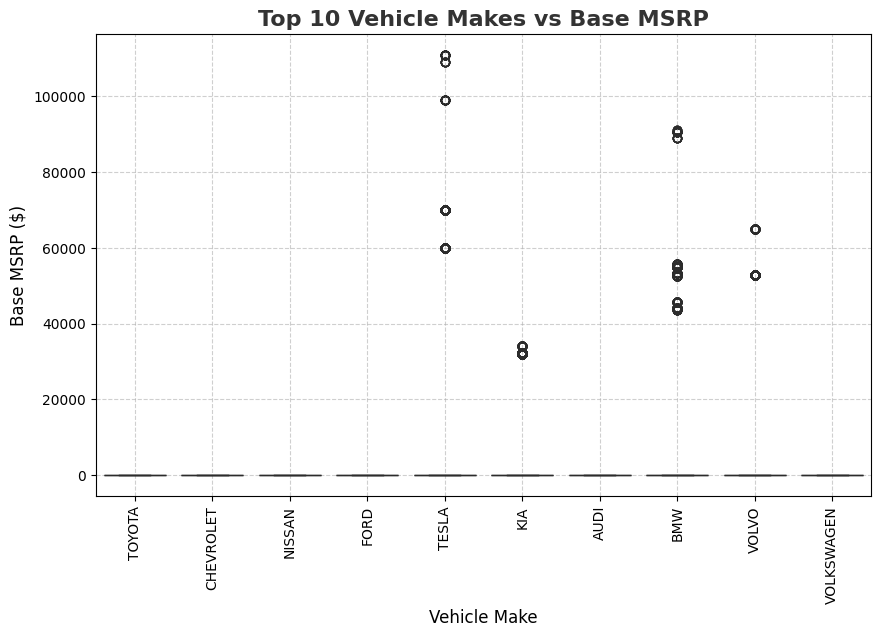

In [33]:
plt.figure(figsize=(10, 6))
top_makes = df_new['Make'].value_counts().nlargest(10).index
sns.boxplot(x='Make', y='Base MSRP', data=df[df['Make'].isin(top_makes)], palette='viridis')  # Using 'viridis' palette
plt.title('Top 10 Vehicle Makes vs Base MSRP', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Vehicle Make', fontsize=12, fontweight='medium')
plt.ylabel('Base MSRP ($)', fontsize=12, fontweight='medium')
plt.xticks(rotation=90, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## **Task 2: Create a Choropleth using plotly.express to display the number of EV vehicles based on location.**

In [39]:
# Sample DataFrame with EV data
state_ev_counts = df.groupby('State').size().reset_index(name='EV_Count')

# Creating the choropleth map with a larger layout and USA in focus
fig = px.choropleth(
    state_ev_counts,
    locations='State',
    locationmode='USA-states',
    color='EV_Count',
    color_continuous_scale='Plasma',  # Desired color scale for highlighting
    scope="usa",  # Focusing on the USA
    labels={'EV_Count': 'Number of EVs'},
    title='Number of Electric Vehicles by State'
)

# Adjust layout to make the map larger and focus on the desired region
fig.update_layout(
    width=1000,              # Increase width
    height=800,              # Increase height
    geo=dict(
        scope='usa',
        projection_type='albers usa',  # Focuses on USA with equal area projection
        lakecolor='rgb(255, 255, 255)',  # Color lakes white
        showlakes=True
    ),
    title_x=0.5
)

fig.show()

## **Task 3: Create a Racing Bar Plot to display the animation of EV Make and its count each year.**

In [40]:
!pip install bar-chart-race


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 2.9 MB/s eta 0:00:00


In [41]:
df_new.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,29.805604,198968248,POINT (-81.80023 24.5545),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,29.805604,5204412,POINT (-114.57245 35.16815),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.000000,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.000000,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.000000,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [47]:
import bar_chart_race as bcr

In [72]:
temp = pd.DataFrame(
    df_new.groupby(["Make", "Model Year"])["VIN (1-10)"].count()
).reset_index() # Remove 'name' argument from reset_index()

# Rename the count column
temp = temp.rename(columns={'VIN (1-10)': 'Count'})

# Filter and sort as before
temp = temp[(temp["Model Year"] >= 2018) & (temp["Model Year"] <= 2024)]
temp = temp.sort_values(by="Model Year").reset_index(drop=True)

In [73]:
print(temp.index)

RangeIndex(start=0, stop=123, step=1)


In [78]:
import plotly.express as px

# Create the animated racing bar plot
fig = px.bar(
    temp,  # Using the filtered and grouped DataFrame 'temp'
    x='Count',
    y='Make',
    color='Make',  # Optional: Color bars by Make
    animation_frame='Model Year',  # Use Year for the animation
    orientation='h',  # Horizontal bar plot
    title='EV Make Count Over the Years',
    labels={'Count': 'EV Count', 'Make': 'Vehicle Make'},
    range_x=[0, temp['Count'].max() + 50]  # Adjust range for better visualization
)

# Customize the layout for enhanced visualization
fig.update_layout(
    xaxis=dict(showgrid=True, gridcolor='LightGray', tickformat=',d'),
    yaxis_title='Make',
    xaxis_title='Number of Vehicles',
    showlegend=False,
    title_x=0.5,
    margin=dict(l=50, r=50, t=50, b=50),
    width=1200,
    height=800,
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 1000, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 500}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

# Display the plot
fig.show()


In [51]:
ev_counts = temp.pivot_table(index='Model Year', columns='Make', values='Count', fill_value=0)


In [57]:
import os

In [79]:
# Pivot the DataFrame to the right format
ev_counts = temp.pivot_table(index='Model Year', columns='Make', values='Count', fill_value=0)

bar_chart_params = {
    'df': ev_counts,                             # DataFrame for the chart
    'filename': "ev_racing_bar.mp4",           # Output file name
    'orientation': "h",                         # Horizontal bar plot
    'sort': "desc",                             # Sort bars in descending order
    'n_bars': 10,                               # Display the top 10 bars
    'steps_per_period': 50,                     # Steps for smoothness
    'period_length': 2000,                      # Duration of each period in milliseconds
    'title': 'EV Make Count Over the Years' # Title settings
}

# Create the racing bar plot and save it as a video
bcr.bar_chart_race(**bar_chart_params)
print("Current working directory:", os.getcwd())
# Confirmation message
print("Video saved as ev_racing_bar.mp4")

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`



Current working directory: /content
Video saved as ev_racing_bar.mp4


Make,AUDI,AZURE DYNAMICS,BENTLEY,BMW,CADILLAC,CHEVROLET,CHRYSLER,FIAT,FISKER,FORD,...,NISSAN,POLESTAR,PORSCHE,RIVIAN,SMART,SUBARU,TESLA,TOYOTA,VOLKSWAGEN,VOLVO
Model Year,,,,,,,,,,,,,,,,,,,,,
2012,0.0,3.0,0.0,0.0,0.0,496.0,0.0,0.0,20.0,15.0,...,610.0,0.0,0.0,0.0,0.0,0.0,134.0,385.0,0.0,0.0
2013,0.0,0.0,0.0,0.0,0.0,818.0,0.0,106.0,0.0,662.0,...,1966.0,0.0,0.0,0.0,29.0,0.0,814.0,296.0,0.0,0.0
2014,0.0,0.0,0.0,457.0,58.0,724.0,0.0,97.0,0.0,628.0,...,694.0,0.0,8.0,0.0,71.0,0.0,683.0,215.0,0.0,0.0
2015,0.0,0.0,0.0,403.0,0.0,467.0,0.0,242.0,0.0,556.0,...,1839.0,0.0,33.0,0.0,52.0,0.0,1089.0,89.0,124.0,0.0
2016,214.0,0.0,0.0,383.0,18.0,309.0,0.0,148.0,0.0,778.0,...,1208.0,0.0,78.0,0.0,31.0,0.0,1639.0,0.0,319.0,112.0
2017,187.0,0.0,0.0,692.0,15.0,2744.0,94.0,167.0,0.0,659.0,...,934.0,0.0,71.0,0.0,34.0,0.0,1679.0,899.0,52.0,115.0
2018,174.0,0.0,0.0,710.0,17.0,1126.0,554.0,53.0,0.0,170.0,...,1232.0,0.0,78.0,0.0,47.0,0.0,7919.0,659.0,39.0,226.0
2019,392.0,0.0,0.0,279.0,0.0,966.0,119.0,9.0,0.0,136.0,...,1409.0,0.0,62.0,0.0,9.0,58.0,4583.0,190.0,495.0,190.0
2020,224.0,0.0,1.0,143.0,0.0,1014.0,286.0,0.0,0.0,65.0,...,580.0,0.0,143.0,0.0,0.0,0.0,7018.0,311.0,0.0,162.0
